# Solar Cycle Analysis

This plots data written by the `process_uncertainties.py` script.

In [2]:
import sys

from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append("../..")
from constants import MIN_DAYSAHEAD, MAX_DAYSAHEAD, BIN_FREQ_PER_DAY

sns.set()

In [8]:
!ls ../../data/processed/gaussian2/k35/

delta_window0	delta_window12	delta_window3  delta_window6  delta_window9
delta_window1	delta_window16	delta_window4  delta_window7
delta_window10	delta_window2	delta_window5  delta_window8


In [16]:
df = pd.read_csv(
    f"../../data/processed/skew_gaussian/k200/delta_window8/processed_daysahead3_R000.csv"
)
df["current_time"] = pd.to_datetime(df["current_time"])
df

,current_time,forward_time,forward_Vp_pred,forward_Vp_obs,forward_mean,forward_sigma,forward_skew,forward_crps
0,2010-01-05 18:00:00,2010-01-08 12:00:00,320.569697,280.69,0.0,85.883217,1.229890,27.328177
1,2010-01-06 00:00:00,2010-01-08 18:00:00,312.584848,288.52,0.0,88.263538,1.221249,23.228200
2,2010-01-06 06:00:00,2010-01-09 00:00:00,304.600000,294.91,0.0,94.110607,1.485750,22.390858
3,2010-01-06 12:00:00,2010-01-09 06:00:00,318.100000,291.04,0.0,98.208772,1.440021,25.906730
4,2010-01-06 18:00:00,2010-01-09 12:00:00,305.400000,284.74,0.0,99.319037,1.414231,24.918707
...,...,...,...,...,...,...,...,...
16036,2020-12-27 18:00:00,2020-12-30 12:00:00,384.250000,476.30,0.0,94.570717,-0.438946,55.268846
16037,2020-12-28 00:00:00,2020-12-30 18:00:00,469.000000,454.90,0.0,75.925035,-0.214369,18.784939
16038,2020-12-28 06:00:00,2020-12-31 00:00:00,453.683333,433.50,0.0,79.318494,-0.176653,20.574252
16039,2020-12-28 12:00:00,2020-12-31 06:00:00,438.366667,382.20,0.0,75.212777,0.053582,33.573597


In [17]:
sc_min = datetime(2010, 1, 1)
sc_max = datetime(2014, 6, 1)
sc_min2 = datetime(2020, 1, 1)

In [18]:
delta = timedelta(days=365)

min_start1 = sc_min
min_end1 = sc_min + delta - timedelta(days=1)
min_start2 = sc_min2 - delta
min_end2 = sc_min2 + delta

max_start = sc_max - delta
max_end = sc_max + delta

forward_idx = 0

strftime = "%Y"
min_label = "Around Solar Minimum\n(2010, 2019-2020)"

strftime = "%b%Y"
max_label = "Around Solar Maximum\n(%s - %s)" % (
    max_start.strftime(strftime),
    max_end.strftime(strftime),
)

(4350,)
(2921,)


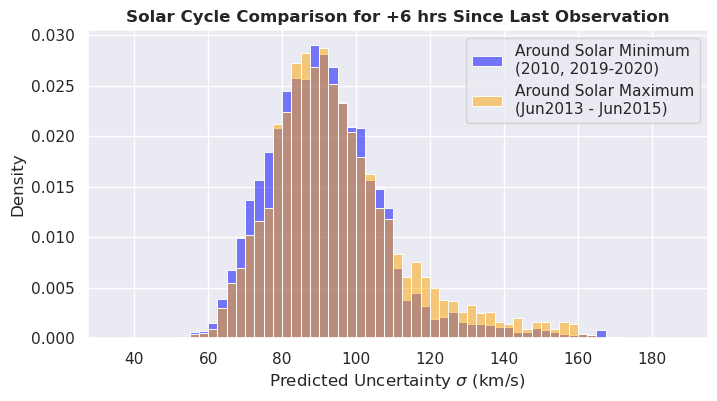

In [19]:
bins = np.arange(35, 190, 2.5)
sigmas_min = df[
    df["current_time"].between(min_start1, min_end1)
    | df["current_time"].between(min_start2, min_end2)
][f"forward_sigma"]
sigmas_max = df[df["current_time"].between(max_start, max_end)][f"forward_sigma"]

print(sigmas_min.shape)
print(sigmas_max.shape)

plt.figure(figsize=(8, 4))
sns.histplot(
    sigmas_min, color="blue", label=min_label, bins=bins, stat="density", alpha=0.5
)
sns.histplot(
    sigmas_max, color="orange", label=max_label, bins=bins, stat="density", alpha=0.5
)
plt.xlabel(r"Predicted Uncertainty $\sigma$ (km/s)")
plt.legend()
plt.title("Solar Cycle Comparison for +6 hrs Since Last Observation", fontweight="bold")
plt.savefig("../../plots/histogram_of_sigmas.png", dpi=300)